In [1]:
import veloxchem as vlx

In [2]:
molecule = vlx.Molecule.read_smiles("OC=CC=O")
molecule.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
scf_drv = vlx.XtbDriver()
scf_drv.ostream.mute()

opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute()

In [4]:
opt_drv.constraints = [
    "set dihedral 6 1 2 3 0.0",
    "freeze distance 6 1",
]

opt_results = opt_drv.compute(molecule)

In [5]:
final_geometry = vlx.Molecule.read_xyz_string(opt_results["final_geometry"])
final_geometry.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
opt_drv.constraints = ["scan dihedral 6 1 2 3 0 360 19"]

opt_results = opt_drv.compute(molecule)

In [7]:
opt_results.keys()

dict_keys(['final_geometry', 'scan_energies', 'scan_geometries'])

In [8]:
import numpy as np
import scipy

occc = np.linspace(0, 360, 19)

e_min_in_au = min(opt_results["scan_energies"])

energy_scan = [
    (e - e_min_in_au) * vlx.hartree_in_kcalpermol()
    for e in opt_results["scan_energies"]
]

spline_func = scipy.interpolate.interp1d(occc, energy_scan, kind="cubic")

x_spline = np.linspace(occc[0], occc[-1], 200)
y_spline = spline_func(x_spline)

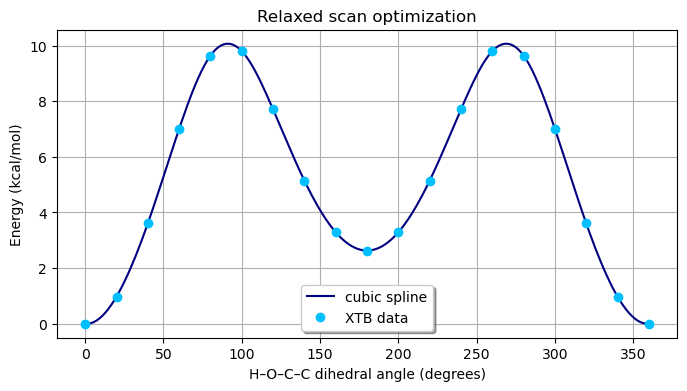

In [9]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x_spline, y_spline, "-", color="navy", label="cubic spline")
ax.plot(occc, energy_scan, "o", color="deepskyblue", label="XTB data")

ax.legend(frameon=True, shadow=True, loc="lower center")

ax.grid(True)

ax.set_title("Relaxed scan optimization")
ax.set_xlabel("H–O–C–C dihedral angle (degrees)")
ax.set_ylabel("Energy (kcal/mol)")

plt.show()